A Data Analysis project that aims to extract insights out of the dataset that is a available on Kaggle "Heart-Attack-Prediction in the united states" This project aims to go on a step-by-step data analysis sequence. It starts by the most convenient, practical, and logical process to start with on data science which is, data cleaning. The project goes on five phases of data cleaning, which are. Handling missing values, remove duplicates, fix data types, detect and treate outliers, and check for inconsistencies. The project is to be complete on different stages of analysis (Heart attack risk factors, predicting heart attack probability, demographic disparities, and other more) and as each stage is done and complete, the Notebook will be edited accordingly.

**Finally, please note that this is a data analysis project that is being analyazed by a data analyzer who has no medical experience or knowledge. Thus, this project should not be used for any medical consumption or treat it is only applicable for research-based purposes.**

In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing


In [2]:
df = pd.read_csv("/kaggle/input/heart-attack-prediction-in-united-states/heart_attack_dataset.csv")
df.head()

,Age,Gender,Cholesterol,BloodPressure,HeartRate,BMI,Smoker,Diabetes,Hypertension,FamilyHistory,...,ExerciseInducedAngina,Slope,NumberOfMajorVessels,Thalassemia,PreviousHeartAttack,StrokeHistory,Residence,EmploymentStatus,MaritalStatus,Outcome
0,31,Male,194,162,71,22.9,0,1,0,0,...,Yes,Downsloping,1,Normal,0,0,Suburban,Retired,Single,No Heart Attack
1,69,Male,208,148,93,33.9,1,1,0,0,...,Yes,Upsloping,2,Normal,0,0,Suburban,Unemployed,Married,No Heart Attack
2,34,Female,132,161,94,34.0,0,0,1,1,...,Yes,Upsloping,0,Normal,1,0,Rural,Retired,Single,Heart Attack
3,53,Male,268,134,91,35.0,0,1,1,0,...,Yes,Flat,0,Reversible defect,1,0,Suburban,Retired,Widowed,No Heart Attack
4,57,Female,203,140,75,30.1,0,1,0,0,...,Yes,Flat,0,Fixed defect,1,0,Rural,Retired,Married,Heart Attack


Before staritng the data analysis of this data set "Heart-attack-prediction. We need to preform some data cleaning process so the data is perfect to be analyzed. Some of the steps we are going to preform on cleaning the dataset involves handling missing values, remove duplicates, fix data types, and some more that we will highlight throughout the process
Now lets get started

# Data Cleaning

In [3]:
#Handling Missing Values

df.isnull().sum()

Age                      0
Gender                   0
Cholesterol              0
BloodPressure            0
HeartRate                0
BMI                      0
Smoker                   0
Diabetes                 0
Hypertension             0
FamilyHistory            0
PhysicalActivity         0
AlcoholConsumption       0
Diet                     0
StressLevel              0
Ethnicity                0
Income                   0
EducationLevel           0
Medication               0
ChestPainType            0
ECGResults               0
MaxHeartRate             0
ST_Depression            0
ExerciseInducedAngina    0
Slope                    0
NumberOfMajorVessels     0
Thalassemia              0
PreviousHeartAttack      0
StrokeHistory            0
Residence                0
EmploymentStatus         0
MaritalStatus            0
Outcome                  0
dtype: int64

Even though, the dataset showing 0-missing values for all columns, there still potential data cleaning needed to ensure perfection. 

In [4]:
#Here we will look for any duplicates
#getting rid of duplicates ensures no distort or bias on the result of the analysis

df.duplicated().sum()


0

No dubplicats on the dataset,

In [5]:
#Veryfing the data types
df.dtypes

Age                        int64
Gender                    object
Cholesterol                int64
BloodPressure              int64
HeartRate                  int64
BMI                      float64
Smoker                     int64
Diabetes                   int64
Hypertension               int64
FamilyHistory              int64
PhysicalActivity           int64
AlcoholConsumption         int64
Diet                      object
StressLevel                int64
Ethnicity                 object
Income                     int64
EducationLevel            object
Medication                object
ChestPainType             object
ECGResults                object
MaxHeartRate               int64
ST_Depression            float64
ExerciseInducedAngina     object
Slope                     object
NumberOfMajorVessels       int64
Thalassemia               object
PreviousHeartAttack        int64
StrokeHistory              int64
Residence                 object
EmploymentStatus          object
MaritalSta

All columns are on the corrct data-type. Yet, some columns(e.g.,Gender, SrtokHistory, PreviousHeartAttack, etc) can still be/get grouped under a 'category' data type. 

In [6]:
#We will convert some of the object data type columns in to a category data type columns

categorics_cols = ["Gender", "Smoker", "Diabetes", "Hypertension", "FamilyHistory",
   "PhysicalActivity", "AlcoholConsumption", "Diet", "StressLevel", 
   "Ethnicity", "Income", "EducationLevel", "Medication", "ChestPainType",
   "ECGResults", "ExerciseInducedAngina", "Slope", "Thalassemia", "PreviousHeartAttack",
   "StrokeHistory", "Residence", "EmploymentStatus", "MaritalStatus"] #A list of the columns that we want to change its data type to categorical
df[categorics_cols] = df[categorics_cols].astype("category")#changing the object data type columns into categorical columns
df[categorics_cols].dtypes

Gender                   category
Smoker                   category
Diabetes                 category
Hypertension             category
FamilyHistory            category
PhysicalActivity         category
AlcoholConsumption       category
Diet                     category
StressLevel              category
Ethnicity                category
Income                   category
EducationLevel           category
Medication               category
ChestPainType            category
ECGResults               category
ExerciseInducedAngina    category
Slope                    category
Thalassemia              category
PreviousHeartAttack      category
StrokeHistory            category
Residence                category
EmploymentStatus         category
MaritalStatus            category
dtype: object

Our object-type columns are now a categorical type.
that will help us in many way in our analysis. Such as, dealing with categorical data types is more memory efficient because they store unique valus only once. As well as operations like grouping/filtering are faster. 

In [7]:
#Next, we will ensure that all the numerical columns are type int64 or float64

numerical_cols = ["Age", "Cholesterol", "BloodPressure", "HeartRate", 
  "BMI", "MaxHeartRate", "ST_Depression", "NumberOfMajorVessels"]
df[numerical_cols].dtypes

Age                       int64
Cholesterol               int64
BloodPressure             int64
HeartRate                 int64
BMI                     float64
MaxHeartRate              int64
ST_Depression           float64
NumberOfMajorVessels      int64
dtype: object

In [8]:
#Now we will ensure that no value is stored as string accidentally

all_numeric = all(df[col].astype(str).str.isnumeric().all() for col in numerical_cols)
all_numeric

False

Getting a False indicates that we at least have one value in "all_numeric" that is not pure numeric string.

In [9]:
#We will troubleshoot and find the values which are causing the problem

for col in numerical_cols:
    if not df[col].astype(str).str.isnumeric().all():#Checkin if the values are numeric
        print(f"Column '{col}' has non-numeric values:", df[col].astype(str)[~df[col].astype(str).str.isnumeric()].unique())
        

Column 'BMI' has non-numeric values: ['22.9' '33.9' '34.0' '35.0' '30.1' '38.7' '21.7' '23.1' '24.8' '24.7'
 '31.7' '29.8' '20.1' '20.3' '34.6' '24.6' '19.6' '22.1' '30.0' '33.8'
 '19.1' '28.0' '23.8' '32.0' '39.8' '27.1' '27.3' '35.2' '24.9' '25.8'
 '28.9' '36.5' '22.7' '25.1' '29.6' '28.4' '29.0' '26.4' '30.9' '23.6'
 '23.5' '19.4' '27.6' '33.0' '33.7' '22.2' '18.1' '28.6' '34.8' '34.4'
 '31.6' '35.8' '32.6' '28.7' '27.8' '30.2' '22.8' '23.2' '21.2' '38.0'
 '39.9' '33.3' '31.5' '21.4' '39.5' '28.5' '38.6' '31.0' '38.2' '39.7'
 '20.6' '39.0' '19.9' '29.3' '22.0' '38.1' '26.5' '20.7' '33.5' '39.3'
 '30.4' '25.9' '22.4' '19.8' '23.7' '35.9' '27.2' '28.8' '34.3' '25.4'
 '31.3' '25.2' '30.3' '20.5' '18.8' '31.4' '28.1' '19.5' '32.7' '30.7'
 '37.3' '36.8' '26.3' '34.5' '26.1' '39.2' '28.3' '25.6' '32.1' '38.4'
 '39.6' '25.5' '26.2' '37.9' '19.0' '21.5' '21.3' '36.3' '35.5' '31.2'
 '37.8' '24.5' '18.2' '29.2' '22.6' '29.1' '35.4' '32.4' '29.5' '37.7'
 '22.5' '27.4' '30.6' '18.4' '35.6' '37.

The output shows that the two columns BMI and ST_Depression have values which are not numeric.
str.isnumeric() only accepts whole numbers without decimal point. However, these values are valid floating-point numbers, not non-numeric data.

In [10]:
#converts the columns (BMI and ST_Depression) to float64

df["BMI"] = pd.to_numeric(df["BMI"], errors='coerce')
df["ST_Depression"] = pd.to_numeric(df["ST_Depression"], errors='coerce')

df["BMI"].dtypes, df["ST_Depression"].dtypes

(dtype('float64'), dtype('float64'))

In [11]:
#Handele NaN Values
df["BMI"] = df["BMI"].fillna(df["BMI"].mean()).infer_objects(copy=False)
df["ST_Depression"] = df["ST_Depression"].fillna(df["ST_Depression"].mean()).infer_objects(copy=False)

len(df["BMI"].isna()), len(df["ST_Depression"].isna())

(372974, 372974)

this indicats that our two columns BMI and ST_Depression has no missing values

Next step after Fix Data Types, is to Detect and Treat Outliers.
Outliers are extrem values (e.g., Age=150). the IQR (InterQuartile Range) is a statical method to identify them. 
We will preform the IQR on all the numerical data type columns.

In [12]:
#Calculating IQR for numerical type columns
#We will define a column that caluculate the IQR for us

def calculate_iqr_bounds(df, columns):
     results = {}
     for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        results[col] = {
            f"{col}: Lower bound = {lower_bound:.2f}. Values below this may be outliers.",
            f"{col}: Upper bound = {upper_bound:.2f}. Values above this may be outliers."
        }
     return results

This is a function that will not only help us calculating the IQR, but it will also print out the upper and lower ranges for the column.
Next we will us the function with all the numerical columns. Then, we will treat Outliers

In [13]:
calculate_iqr_bounds(df, 
['Age',
 'Cholesterol',
 'BloodPressure',
 'HeartRate',
 'BMI',
 'MaxHeartRate',
 'ST_Depression',
 'NumberOfMajorVessels'])

{'Age': {'Age: Lower bound = 1.00. Values below this may be outliers.',
  'Age: Upper bound = 113.00. Values above this may be outliers.'},
 'Cholesterol': {'Cholesterol: Lower bound = -1.00. Values below this may be outliers.',
  'Cholesterol: Upper bound = 399.00. Values above this may be outliers.'},
 'BloodPressure': {'BloodPressure: Lower bound = 44.50. Values below this may be outliers.',
  'BloodPressure: Upper bound = 224.50. Values above this may be outliers.'},
 'HeartRate': {'HeartRate: Lower bound = 27.50. Values below this may be outliers.',
  'HeartRate: Upper bound = 151.50. Values above this may be outliers.'},
 'BMI': {'BMI: Lower bound = 7.00. Values below this may be outliers.',
  'BMI: Upper bound = 51.00. Values above this may be outliers.'},
 'MaxHeartRate': {'MaxHeartRate: Lower bound = 49.00. Values below this may be outliers.',
  'MaxHeartRate: Upper bound = 249.00. Values above this may be outliers.'},
 'ST_Depression': {'ST_Depression: Lower bound = -2.50. Va

Using the function we created (the "calculate_iqr_bounds(df, columns)" function) we managed to find the upper and lower bounds for each numerical column

The next step is to Treat the Outliers. And when preforming this step you get to choose between three options
1. Cap Values: Replacing outliers with bound values
2. Remove: Droping the outlier rows
3. Keep: if outliers are valid
Based on our dataset we will choose to Cap Values

There is one important operation needs to be done before actually treating outliers. That is to determin whether outliers are errors or valid data. To do that we will preform a statistical investigation that is, we will use distribution visualization to. particularly we will use boxplot which will help us to display median, quartiles, and any points that fall outside the typical rang. 

Text(0.5, 1.0, 'Boxplot of Numerical Features')

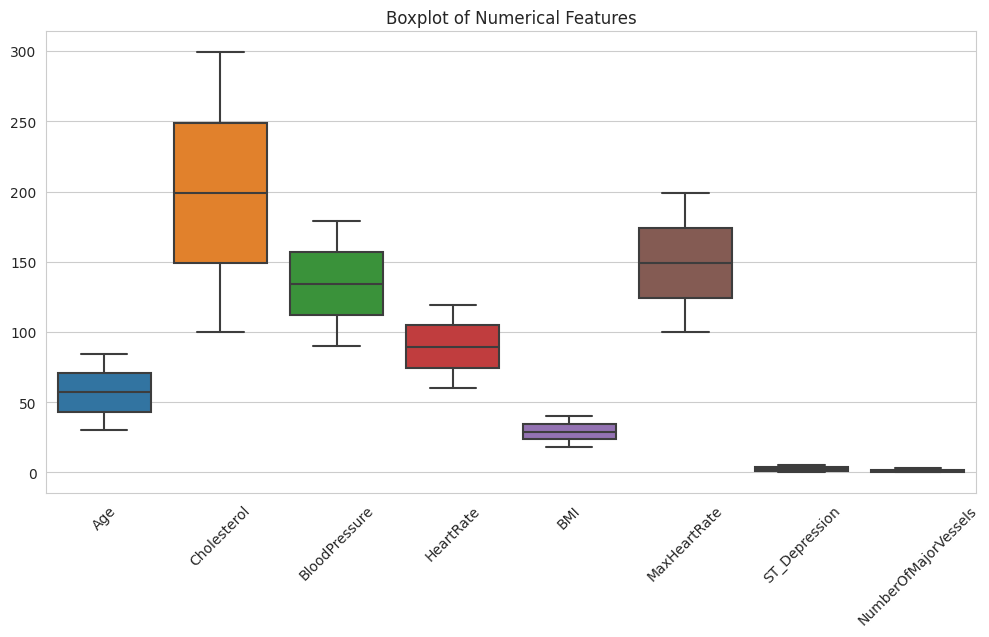

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

#Plotting a boxplot

sns.set_style("whitegrid")
plt.figure(figsize=(12,6))

sns.boxplot(data=df[numerical_cols])
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical Features")

Text(0.5, 1.0, 'ST_Depression and NumberOfMajorVessels')

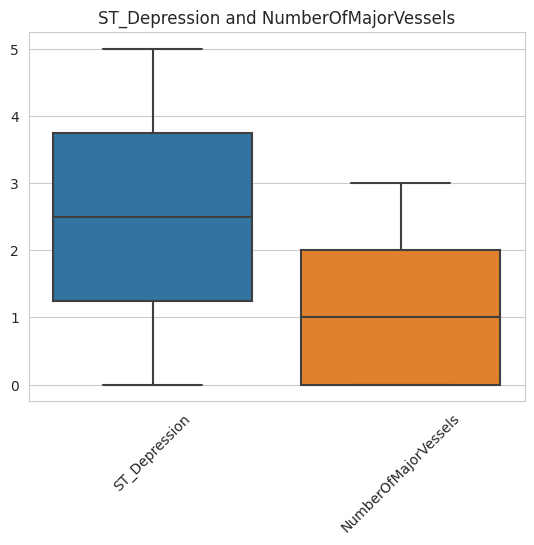

In [15]:
#Plotting ST_Depression and NumberOfMajorVessels for better readablity
sns.boxplot(data=df[["ST_Depression", "NumberOfMajorVessels"]])
plt.xticks(rotation=45)
plt.title("ST_Depression and NumberOfMajorVessels")

These tow visualizations indecates that no extreme outliers are present for our numerical datasets. Thus, we can move to the next step.

Resolve Inconsistencies: typos, mismatched categories, or contradicoty data(e.g., age = 5, smoker=yes) which reduces the quality of the data

In [16]:
df[categorics_cols].dtypes

Gender                   category
Smoker                   category
Diabetes                 category
Hypertension             category
FamilyHistory            category
PhysicalActivity         category
AlcoholConsumption       category
Diet                     category
StressLevel              category
Ethnicity                category
Income                   category
EducationLevel           category
Medication               category
ChestPainType            category
ECGResults               category
ExerciseInducedAngina    category
Slope                    category
Thalassemia              category
PreviousHeartAttack      category
StrokeHistory            category
Residence                category
EmploymentStatus         category
MaritalStatus            category
dtype: object

In [17]:
df["Gender"].value_counts()#Spotting issues(e.g., Meal instade of Male)

#Incase of a typos
df["Gender"].replace({'Meal': 'Male'})

df[(df["Smoker"] == "yes") & (df["Age"] < 10)]#This checks if a smoker is actually under the age of 10. In that case we would either correct or drop these values


,Age,Gender,Cholesterol,BloodPressure,HeartRate,BMI,Smoker,Diabetes,Hypertension,FamilyHistory,...,ExerciseInducedAngina,Slope,NumberOfMajorVessels,Thalassemia,PreviousHeartAttack,StrokeHistory,Residence,EmploymentStatus,MaritalStatus,Outcome


These operations are done repeatedly on all the categorical columns
Fortunately our dataset has no any Inconsistency that would need to be resolved.  

At this stage, we can happily say that our data set has been cleand and fully ready to be analyzed and extract insights out of it to the best levels.
Here is a recap of what we have done in this process of cleaning our dataset
1. Handle Missing Values
2. Remove duplicates (no in our case)
3. Fix data types
4. Detect and treate outliers (only detected them we have not had to treat them
5. Check for Inconsistencies

# Exploratory Data Analysis (EDA)

After, data cleaning we move to the second essential data analysis step which is Exploratory Data Analysis (EDA).
In this step we will go through different phases which are:
1. Understand dataset structure
2. Visualize data Distributions
3. Identify relationships and correlations
4. Analyze target variable
5. Check data quality and pattrens
6. Documents and summerize findings


Before actually jumping into EDA. We need to highlight some important domain knowledge. Having domain knowledge will help in interpreting the dataset's variables, validating our findings and will ensure our analysis aligns with medical realities.

*Heart-Attack*
occures to an individual when flow of blood to the heart is severely reduced or even blocked.
source: [Heart-attack](http://www.mayoclinic.org/diseases-conditions/heart-attack/symptoms-causes/syc-20373106)

**Risk-Factors**
1. **Gender**:Research shows that along with typical risk factors—such as high blood pressure, high cholesterol, and diabetes—men are at increased risk of heart attack earlier in life due to hormone changes, abdominal obesity, and emotional challenges in middle adulthood. source: [Gender](https://www.medstarhealth.org/blog/heart-disease-men#:~:text=Research%20shows%20that%20along%20with%20typical%20risk%20factors%E2%80%94such,abdominal%20obesity%2C%20and%20emotional%20challenges%20in%20middle%20adulthood.)
2. **Cholesterol**: HDL("good" Cholesterol) is the one that needs to be high (idealy above 60). LDL("bad" Cholesterol) the one that needs to be low (below 100). Total should be below 200. source: [Ideal Cholesterol Levels](https://my.clevelandclinic.org/health/articles/11920-cholesterol-numbers-what-do-they-mean)
3. **Blood Pressure**: Blood pressure is considerd high in case of consistent systolic readings of 130 mm Hg or higher, or diastolic readings of 80 mm Hg or higher. source: [Blood Pressure Ranges](https://www.nhlbi.nih.gov/health/high-blood-pressure#:~:text=Your%20blood%20pressure%20is%20high%20when%20you%20have,usually%20occur%20until%20it%20causes%20serious%20health%20problems.)
4. **Heart Rate**: normal heart rate is between 60 and 100 beats per minute (60-100/min). source:[Heart Rates](https://www.healthdirect.gov.au/resting-heart-rate#:~:text=For%20adults%2C%20a%20normal%20resting%20heart%20rate%20is,neck%20and%20counting%20the%20beats%20for%20one%20minute.)
5. **BMI(Body Mass Index)**: A BMI between 18.5 and 25kg/m^2 indicates a normal weight. A BMI of less than 18.5kg/m^2 considered underweight. A BMI between 25kg/m^2 and 29.9kg/m^2 is considered overweight. A BMI of 30kg/m^2 or higher is considered obese. source: [BMI Ranges](https://www.heart.org/en/healthy-living/healthy-eating/losing-weight/bmi-in-adults#:~:text=A%20BMI%20between%2018.5%20and%2025%20kg%2Fm%C2%B2%20indicates,of%2030%20kg%2Fm%C2%B2%20or%20higher%20is%20considered%20obese.)
6. **Smoking**: a major risk factor for hearrt disease. It dameges the blood vassels. source: [Smoking Effects on blood vassels](https://www.nhlbi.nih.gov/health/heart/smoking#:~:text=Smoking%20is%20a%20major%20risk%20factor%20for%20heart,develop%20atherosclerosis%2C%20or%20plaque%20buildup%20in%20the%20arteries.)
7. **Alcoholic Consumption**:Moderate drinking does not reduce the risk of death. Instead, it may increase the risk of chronic diseases like cancer and heart disease. source: [Alcoholic Consumption](https://www.cdc.gov/alcohol/about-alcohol-use/moderate-alcohol-use.html#:~:text=Moderate%20drinking%20increases%20health%20risks%20compared%20to%20not,cancer%20and%20heart%20disease.%203%204%205%20)
8. **Physical Activity**: all adults shoud undertake 150-300mins of moderate-intensity, or 75-150mins of vigorous-intensity per week. source:[Physical Activity](https://pmc.ncbi.nlm.nih.gov/articles/PMC7719906/#:~:text=All%20adults%20should%20undertake%20150%E2%80%93300%20min%20of%20moderate-intensity%2C,moderate-intensity%20and%20vigorous-intensity%20aerobic%20physical%20activity%2C%20per%20week.)
9. **Family History**: family history of cardiovascular disease (CVD) modifies future CVD risk. Siblings of patients with CVD have about 40% risk increase. source: [Family history with CVD](https://pmc.ncbi.nlm.nih.gov/articles/PMC4229162/#:~:text=Family%20history%20of%20CVD%20modifies%20future%20CVD%20risk,CVD%20have%20a%2060%25%20to%2075%25%20risk%20increase.)
10. **Income and Education Level**: Lower income and education correlate with higher risk due to limited access to healthcare. source:[Low Education and CVD](https://pmc.ncbi.nlm.nih.gov/articles/PMC11017042/)
11. **Employment and Residence Status**: Prevalences of adverse health outcomes increased with unemployment duration and were highest for those unable to work. Employment is a health equity issue. source: [Employment and Health issues](https://pmc.ncbi.nlm.nih.gov/articles/PMC8678322/)
12. **Marital Status**: Unmarried patients with known or suspected CAD have an increased risk of all-cause and CVD mortality compared with married ones. source:[Marital Status and CVD](https://www.ahajournals.org/doi/full/10.1161/jaha.117.005890)

In [18]:
df.describe()

,Age,Cholesterol,BloodPressure,HeartRate,BMI,MaxHeartRate,ST_Depression,NumberOfMajorVessels
count,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000
mean,56.975151,199.455844,134.508234,89.495043,29.006733,149.463896,2.501799,1.498525
std,15.867016,57.723381,25.984528,17.342658,6.345460,28.849990,1.443696,1.118003
min,30.000000,100.000000,90.000000,60.000000,18.000000,100.000000,0.000000,0.000000
25%,43.000000,149.000000,112.000000,74.000000,23.500000,124.000000,1.250000,0.000000
50%,57.000000,199.000000,134.000000,89.000000,29.000000,149.000000,2.500000,1.000000
75%,71.000000,249.000000,157.000000,105.000000,34.500000,174.000000,3.750000,2.000000
max,84.000000,299.000000,179.000000,119.000000,40.000000,199.000000,5.000000,3.000000


# EDA 
# 1. Understanding Data Structure

In this section of the EDA, we will try to understand how our data is represented using the essential backbone information of statistics which lies under mean, median, min, max, and quartiles.
A part form these theoretical statical information, we also believe that a picture is worth a thousand words, and that is why we will use a totally general visualization to see the full picture of the dataset. After that we will dive into more details and extract useful analysis.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372974 entries, 0 to 372973
Data columns (total 32 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   Age                    372974 non-null  int64   
 1   Gender                 372974 non-null  category
 2   Cholesterol            372974 non-null  int64   
 3   BloodPressure          372974 non-null  int64   
 4   HeartRate              372974 non-null  int64   
 5   BMI                    372974 non-null  float64 
 6   Smoker                 372974 non-null  category
 7   Diabetes               372974 non-null  category
 8   Hypertension           372974 non-null  category
 9   FamilyHistory          372974 non-null  category
 10  PhysicalActivity       372974 non-null  category
 11  AlcoholConsumption     372974 non-null  category
 12  Diet                   372974 non-null  category
 13  StressLevel            372974 non-null  category
 14  Ethnicity           

In [20]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)



'Age',
 'Cholesterol',
 'BloodPressure',
 'HeartRate',
 'BMI',
 'MaxHeartRate',
 'ST_Depression',
 'NumberOfMajorVessels'

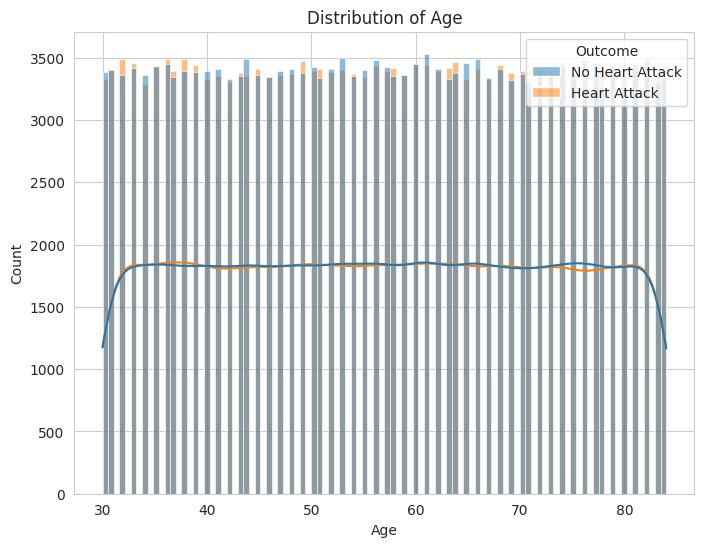

In [33]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x="Age", hue="Outcome",bins=100, kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Text(0.5, 1.0, 'Boxplot of Cholesterol Levels')

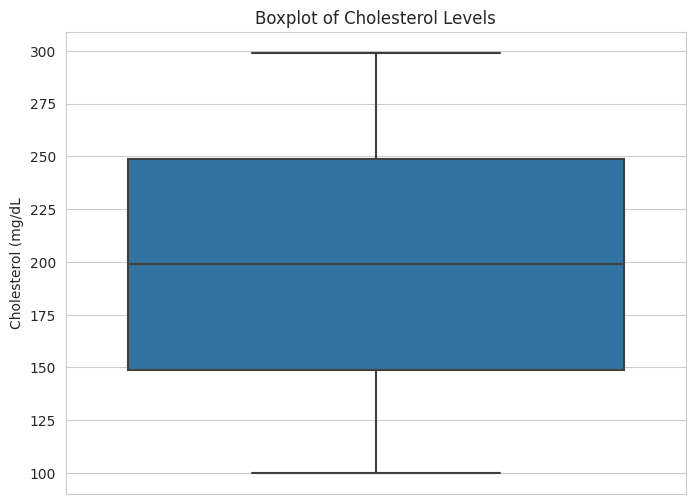

In [22]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, y='Cholesterol')
plt.ylabel("Cholesterol (mg/dL")
plt.title("Boxplot of Cholesterol Levels")

Text(0, 0.5, 'Cholesterol Level (mg/dL)')

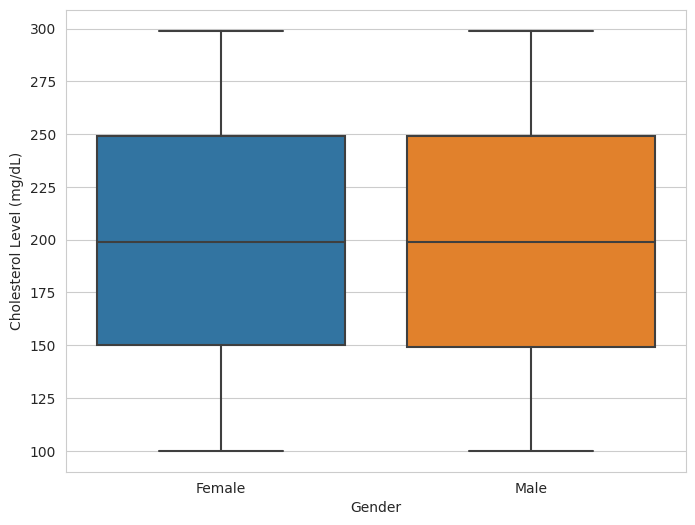

In [23]:
#Comparing cholesterol Levels by gender
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="Gender", y="Cholesterol")
plt.xlabel("Gender")
plt.ylabel("Cholesterol Level (mg/dL)")

Text(0, 0.5, 'Count')

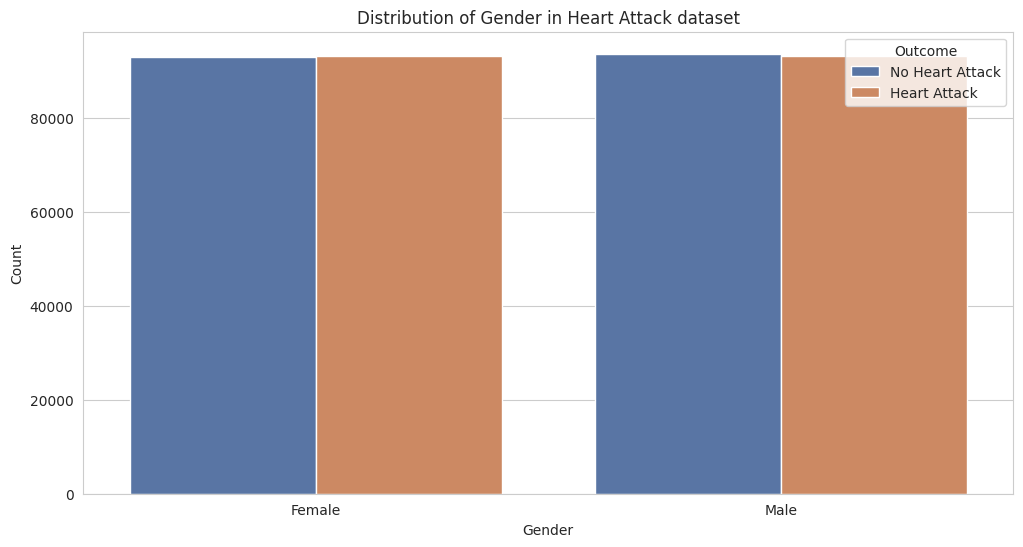

In [24]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="Gender", hue="Outcome", palette="deep")
plt.title("Distribution of Gender in Heart Attack dataset")
plt.xlabel("Gender")
plt.ylabel("Count")

In [25]:
df["Gender"].value_counts()

Gender
Male      186770
Female    186204
Name: count, dtype: int64

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


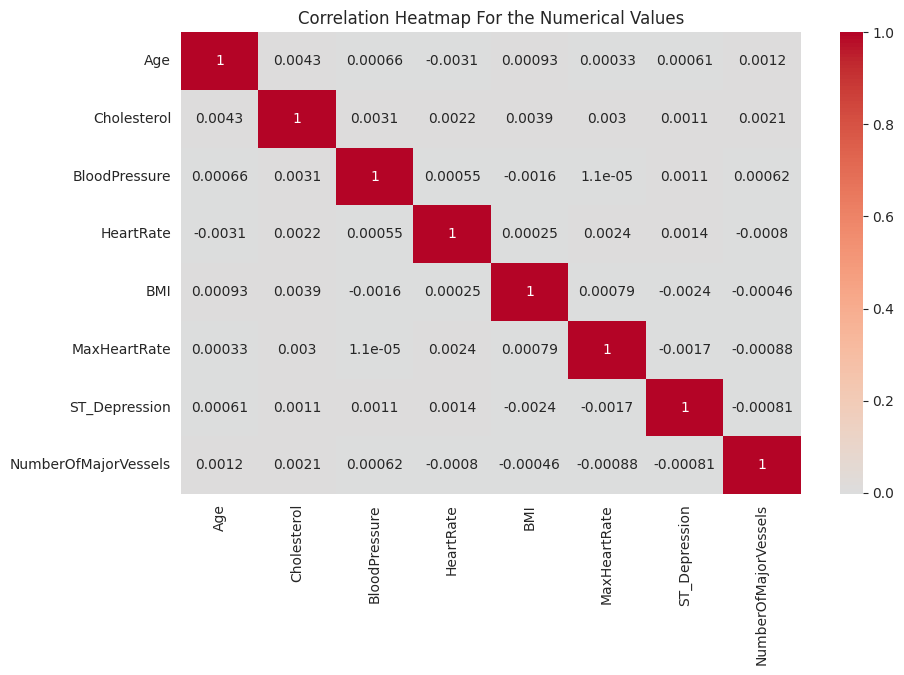

In [26]:
plt.figure(figsize=(10,6))
correlation_matrix = df[numerical_cols].corr()
correlation_matrix.fillna(0, inplace=True)  # Replace NaN with 0
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap For the Numerical Values")

df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
warnings.simplefilter(action='ignore', category=FutureWarning)

Text(0.5, 1.0, 'Age Distribution By Gender')

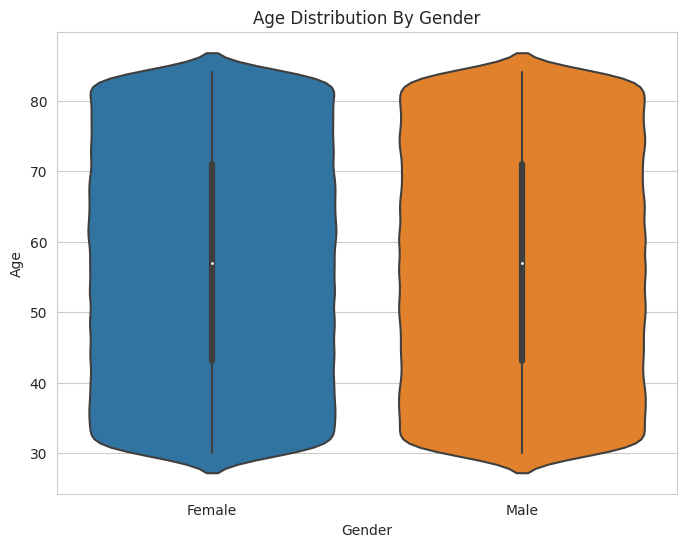

In [27]:
plt.figure(figsize=(8,6))
sns.violinplot(data=df, x="Gender", y="Age")
plt.title("Age Distribution By Gender")

In [28]:
plt.figure(figsize=(8,6))


<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Number of Heart Attack By Age')

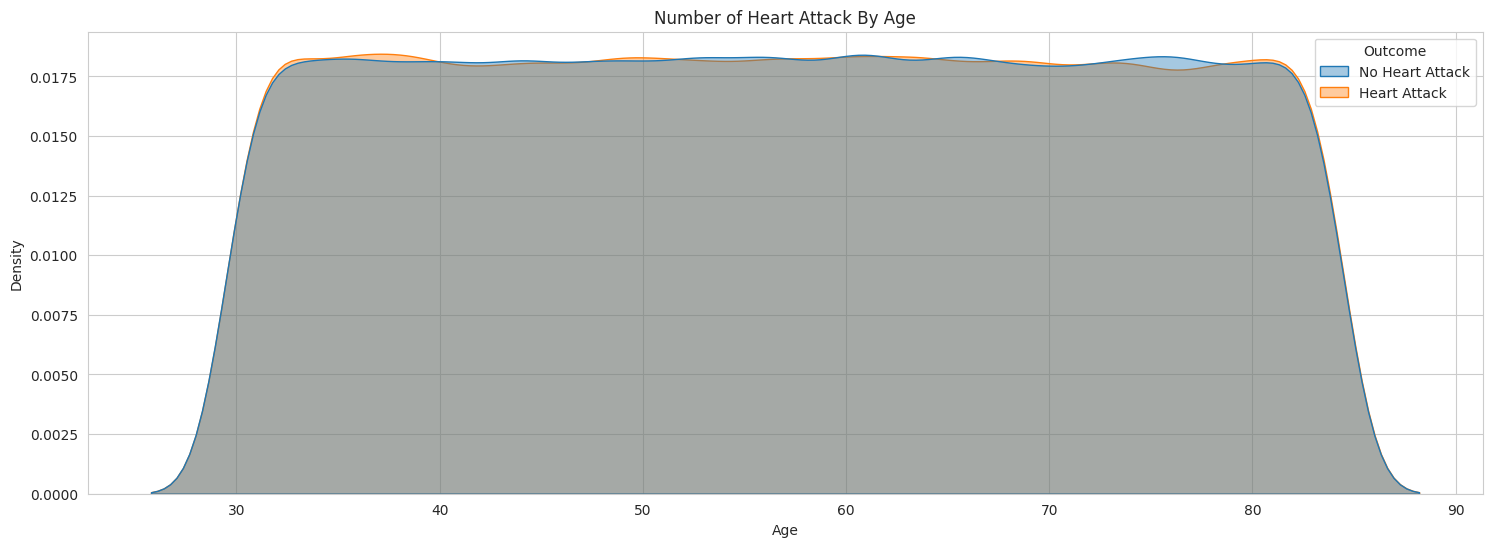

In [29]:
#Which age has the biggest number of heart attack?
import matplotlib.pyplot as plt

plt.figure(figsize=(18,6))
sns.kdeplot(data=df, x="Age", hue="Outcome", common_norm=False, fill=True, alpha=0.4)
plt.title("Number of Heart Attack By Age")

In [30]:
df_age = df.groupby(["Age", "Outcome"]).size().reset_index(name="Count")
df_age #a count of unique occurrences by age and outcome columns and resets the index

,Age,Outcome,Count
0,30,Heart Attack,3329
1,30,No Heart Attack,3386
2,31,Heart Attack,3398
3,31,No Heart Attack,3400
4,32,Heart Attack,3490
...,...,...,...
105,82,No Heart Attack,3476
106,83,Heart Attack,3362
107,83,No Heart Attack,3308
108,84,Heart Attack,3386


In [31]:
#Calculating percentage for each age group 
df_age["Percentage"] = df_age.groupby("Age")["Count"].apply(lambda x: x / x.sum() * 100).reset_index(drop=True)
df_age

,Age,Outcome,Count,Percentage
0,30,Heart Attack,3329,49.575577
1,30,No Heart Attack,3386,50.424423
2,31,Heart Attack,3398,49.985290
3,31,No Heart Attack,3400,50.014710
4,32,Heart Attack,3490,50.926601
...,...,...,...,...
105,82,No Heart Attack,3476,49.778032
106,83,Heart Attack,3362,50.404798
107,83,No Heart Attack,3308,49.595202
108,84,Heart Attack,3386,50.244843


Text(0.5, 1.0, 'Percentage of Heart Attacks by Age')

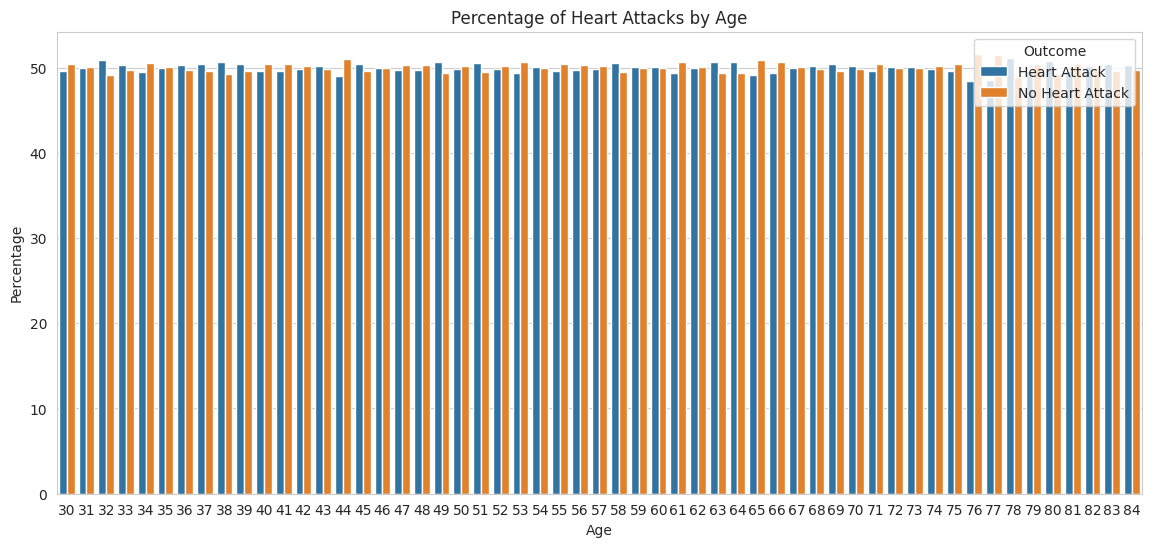

In [32]:
plt.figure(figsize=(14,6))
sns.barplot(
    data=df_age,
    x="Age",
    y="Percentage",
    hue="Outcome"
)
plt.title("Percentage of Heart Attacks by Age")